In [1]:
import os, sys
from utils import mining_data_tb as md_tb
from utils import folders_tb as f_tb
from utils import visualization_tb as v_tb
from utils import models as mo_tb
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from sys import path
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras.metrics import Accuracy, Recall, Precision
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import backend

#import numpy as np

In [2]:
import pandas as pd
import json

---

In [3]:
df_para_flask = pd.DataFrame(data=[[1,2],[3,4]], columns=['a','b'])
df_para_flask

a  b
0  1  2
1  3  4

In [4]:
f_tb.df_to_csv(df_para_flask, 'data_files.csv')

---

---

In [2]:
backend.clear_session()

# NO OLVIDAR DE PONER SI LOS DATOS ESTAN O NO LIMPIOS. POR EJEMPLO, SI ESTAN BALANCEADO O NO ESTAN BALANCEADO EL NUMERO DE IMAGENES QUE SE DISPONEN. PARA ESTO QUIZA DEBA USAR UNA DE LAS FUNCIONES QUE CREE Y NO USE

## Nombres de las carpetas

Los nombres de las carpetas que se encuentran en los conjuntos de train y test tienen la siguiente forma:

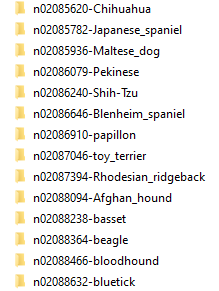

In [3]:
nombre_carpetas_originales = Image.open('../resources/nombre_carpetas_original.png','r')
nombre_carpetas_originales

## Renombrando las carpetas

Con la finalidad de utilizar el nombre de la carpeta como label para las imágenes que se encuentran dentro de ella, resulta conveniente que su nombre sea tal como la raza a la que corresponde.

Este proceso debe realizarse tanto con las carpetas que se encuentran en el conjunto de **train**, como en el de **test**.

In [3]:
# Este código debe ejecutarse una única vez para que las carpetas mantengan sus nombres.

# md_tb.renombrar_carpetas('train')

In [4]:
# Este código debe ejecutarse una única vez para que las carpetas mantengan sus nombres.

# md_tb.renombrar_carpetas('test')

In [4]:
os.listdir('../data/fotos_perros/train')[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

In [10]:
os.listdir('../data/fotos_perros/test')[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

In [5]:
os.listdir('../data/fotos_perros/train') == os.listdir('../data/fotos_perros/test')

True

Ahora se puede ver cómo los nombres de las carpetas se corresponden con los labels de las imágenes que tienen en su interior, en el formato deseado.

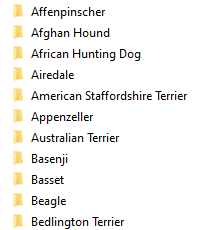

In [7]:
nombre_carpetas_labels = Image.open('../resources/nombre_carpetas_labels.png','r')
nombre_carpetas_labels

In [6]:
path_train = '../data/fotos_perros/train/'
path_test = '../data/fotos_perros/test/'

In [3]:
#dict_train = f_tb.cargar_imagenes_diccionario(path_train)

In [8]:
#dict_test = f_tb.cargar_imagenes_diccionario(path_test)

In [7]:
seed = 42
batch_size = 10
img_height = 224
img_width = 224
val_split = 0.2

train_ds, val_ds = f_tb.cargar_imagenes_tf(batch_size, img_height, img_width, path_train, val_split, seed)

Found 12000 files belonging to 120 classes.
Using 9600 files for training.
Found 12000 files belonging to 120 classes.
Using 2400 files for validation.


In [8]:
razas = train_ds.class_names
razas[0:7]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier',
 'Appenzeller',
 'Australian Terrier']

c:\Users\LeoFr\Desktop\BootCamp\CARPETAS_profesorYalumno\Proyectos\leonardo_frazzetto_yeqre_apr\src\utils\visualization_tb.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(np.sqrt(a), np.sqrt(a), i + 1)


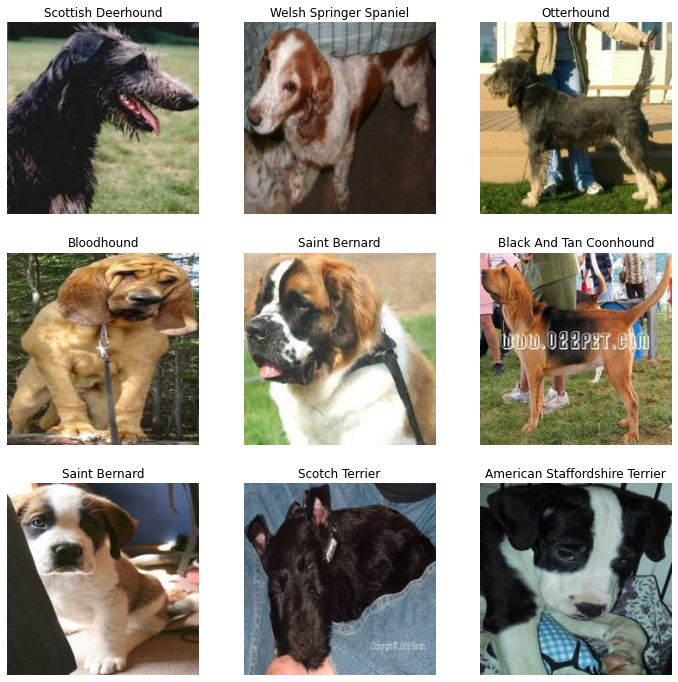

In [9]:
v_tb.plot_cuadricula_perros_train(train_ds, batch_size)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model1

Se realiza redimensionamiento y escalado dentro del mismo modelo.

## RESIZING dentro del modelo ANTES de estandarizar

## Definiendo model1

In [11]:
num_classes = 120

original_heigt = 224
original_width = 224

resizing_height = 64
resizing_width = 64

model1 = Sequential([
  layers.experimental.preprocessing.Resizing(input_shape=(original_heigt, original_width, 3), height=resizing_height, width=resizing_width, interpolation='bilinear'),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

## Compilación de model1

In [12]:
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

## Resumen de model1

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Entrenamiento de model1

In [14]:
epochs=10

model1.fit(train_ds,
          validation_data=val_ds,
          epochs=epochs,
          verbose = 1)

Epoch 1/10
960/960 [==============================] - 99s 77ms/step - loss: 4.7662 - accuracy: 0.0082 - val_loss: 4.5922 - val_accuracy: 0.0254
Epoch 2/10
960/960 [==============================] - 87s 90ms/step - loss: 4.4025 - accuracy: 0.0359 - val_loss: 4.3211 - val_accuracy: 0.0404
Epoch 3/10
960/960 [==============================] - 114s 119ms/step - loss: 4.0741 - accuracy: 0.0741 - val_loss: 4.0823 - val_accuracy: 0.0658
Epoch 4/10
960/960 [==============================] - 140s 146ms/step - loss: 3.7366 - accuracy: 0.1268 - val_loss: 4.1000 - val_accuracy: 0.0838
Epoch 5/10
960/960 [==============================] - 115s 119ms/step - loss: 3.3469 - accuracy: 0.1905 - val_loss: 4.2441 - val_accuracy: 0.0917
Epoch 6/10
960/960 [==============================] - 107s 111ms/step - loss: 2.8952 - accuracy: 0.2822 - val_loss: 4.3791 - val_accuracy: 0.0854
Epoch 7/10
960/960 [==============================] - 95s 99ms/step - loss: 2.3940 - accuracy: 0.3906 - val_loss: 4.9011 - val_a

## Se guarda model1 para poder utilizarlo cuando se desee

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [15]:
mo_tb.guardar_modelo(model1, 'model1')

## En las gráficas se puede evidenciar la presencia de overfitting, ya que se obtiene una precisión mucho mayor para el conjunto de entrenamiento a la obtenida para el conjunto de validación.

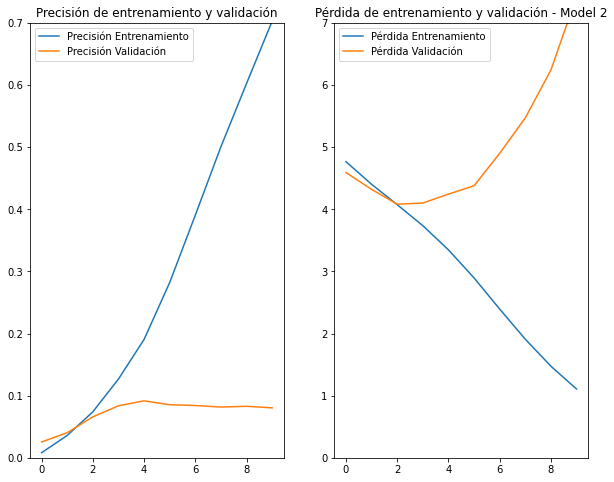

In [17]:
acc = model1.history.history['accuracy']
val_acc = model1.history.history['val_accuracy']

loss = model1.history.history['loss']
val_loss = model1.history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión Validación')
plt.legend(loc='upper left')
plt.title('Precisión de entrenamiento y validación')
plt.ylim(0,0.7)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida Validación')
plt.legend(loc='upper left')
plt.title('Pérdida de entrenamiento y validación - Model 2')


plt.ylim(0,7)
plt.show()

In [20]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

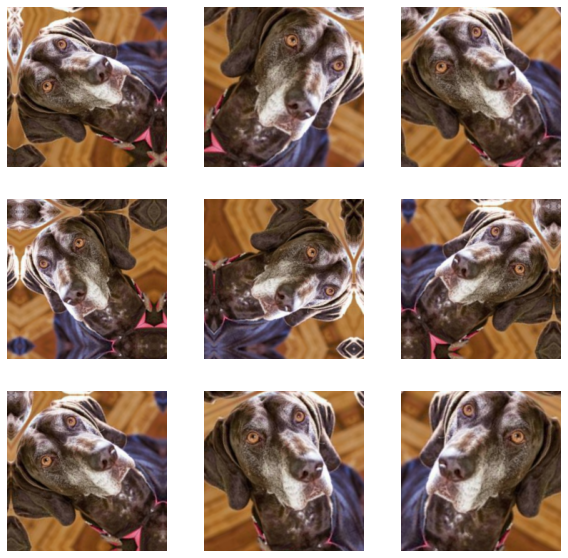

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
num_classes = 120

original_heigt = 224
original_width = 224

resizing_height = 64
resizing_width = 64

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Resizing(input_shape=(original_heigt, original_width, 3), height=resizing_height, width=resizing_width, interpolation='bilinear'),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [23]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

In [90]:
epochs = 15

model2.fit(train_ds,
          validation_data=val_ds,
          epochs=epochs,
          verbose = 1)

Epoch 1/15
960/960 [==============================] - 82s 85ms/step - loss: 4.6660 - accuracy: 0.0168 - val_loss: 4.3257 - val_accuracy: 0.0354
Epoch 2/15
960/960 [==============================] - 84s 87ms/step - loss: 4.2611 - accuracy: 0.0456 - val_loss: 4.0785 - val_accuracy: 0.0658
Epoch 3/15
960/960 [==============================] - 79s 83ms/step - loss: 4.0624 - accuracy: 0.0656 - val_loss: 3.9885 - val_accuracy: 0.0708
Epoch 4/15
960/960 [==============================] - 79s 82ms/step - loss: 3.9432 - accuracy: 0.0801 - val_loss: 3.9279 - val_accuracy: 0.0754
Epoch 5/15
960/960 [==============================] - 80s 83ms/step - loss: 3.8430 - accuracy: 0.0971 - val_loss: 3.8623 - val_accuracy: 0.0892
Epoch 6/15
960/960 [==============================] - 83s 86ms/step - loss: 3.7595 - accuracy: 0.1131 - val_loss: 3.8233 - val_accuracy: 0.0925
Epoch 7/15
960/960 [==============================] - 81s 85ms/step - loss: 3.6791 - accuracy: 0.1213 - val_loss: 3.7883 - val_accuracy:

In [91]:
mo_tb.guardar_modelo(model2, 'model2')

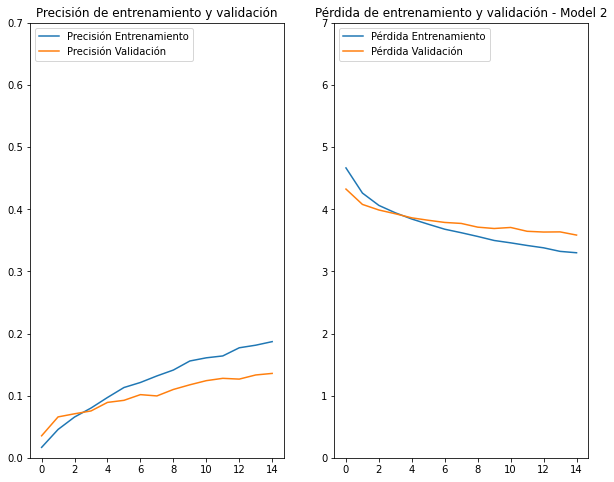

In [92]:
acc_model2 = model2.history.history['accuracy']
val_acc_model2 = model2.history.history['val_accuracy']

loss_model2 = model2.history.history['loss']
val_loss_model2 = model2.history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_model2, label='Precisión Entrenamiento')
plt.plot(epochs_range, val_acc_model2, label='Precisión Validación')
plt.legend(loc='upper left')
plt.title('Precisión de entrenamiento y validación')
plt.ylim(0,0.7)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_model2, label='Pérdida Entrenamiento')
plt.plot(epochs_range, val_loss_model2, label='Pérdida Validación')
plt.legend(loc='upper left')
plt.title('Pérdida de entrenamiento y validación - Model 2')


plt.ylim(0,7)
plt.show()

## Se implemente otra forma de realizar la Data Augmentation, con la idea de cargar los ficheros con el preprocesamiento ya realizado.

# ESTO DE ACA LO TENGO QUE HACER SIGUIENDO EL EJEMPLO DE YOUTUBE

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_

In [13]:
test_ds = f_tb.cargar_imagenes_tf(10, 224, 224, path_test, 0, 42)

Found 8580 files belonging to 120 classes.


In [14]:
prediccion = model1.predict(test_ds)

In [18]:
prediccion.shape

(8580, 120)

In [39]:
prediccion[0]

array([1.75899642e-11, 2.45038495e-06, 3.39918121e-10, 1.11220991e-10,
       9.33614653e-03, 2.45261287e-08, 6.97759003e-11, 3.78020544e-04,
       1.43557340e-02, 1.66847349e-05, 2.09049446e-07, 1.94255350e-08,
       1.27722152e-10, 3.73119690e-07, 6.20632647e-08, 6.64933225e-07,
       7.21961715e-06, 1.31422455e-08, 5.22736311e-02, 4.44492976e-08,
       1.12412545e-10, 3.38190489e-08, 3.57563978e-10, 1.24776940e-04,
       8.33523359e-07, 6.89484647e-09, 9.23679633e-10, 1.58085531e-04,
       5.54244252e-07, 4.56652837e-03, 3.97059802e-10, 7.35468177e-07,
       1.21254154e-04, 1.92722637e-05, 1.34735254e-08, 2.41850756e-07,
       6.51547039e-09, 1.40350981e-04, 6.17317028e-06, 1.88583513e-08,
       1.05659901e-05, 6.26837436e-06, 1.96411311e-05, 3.61846702e-04,
       9.05749949e-14, 2.15064779e-06, 1.22167585e-05, 2.47001068e-08,
       1.74374406e-07, 3.23087260e-12, 1.05610169e-08, 3.37176898e-04,
       7.39743475e-11, 7.53973417e-09, 3.32163630e-10, 4.75971973e-07,
      

In [64]:
test_ds.class_names[np.argmax(prediccion[0])]

'Standard Poodle'

In [51]:
test_ds.file_paths[0]

'../data/fotos_perros/test/Malamute\\n02110063_12656.jpg'

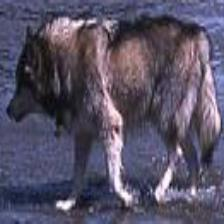

In [53]:
test_ds_0 = Image.open('../data/fotos_perros/test/Malamute/n02110063_12656.jpg','r')
test_ds_0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
SHAPE (10, 224, 224, 3)
LABEL = tf.Tensor([108  20  12  16  82  49  92  45  41  50], shape=(10,), dtype=int32)


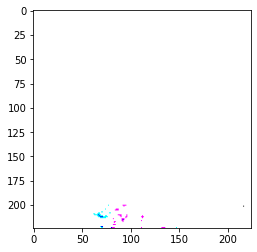

In [63]:
for images, labels in train_ds.take(1):
    plt.imshow(images[9])
    print('SHAPE', images.shape)
    print('LABEL =', labels)
    print('============================================================')

In [ ]:
test_ds.

In [42]:
test_ds.class_names

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier',
 'Appenzeller',
 'Australian Terrier',
 'Basenji',
 'Basset',
 'Beagle',
 'Bedlington Terrier',
 'Bernese Mountain Dog',
 'Black And Tan Coonhound',
 'Blenheim Spaniel',
 'Bloodhound',
 'Bluetick',
 'Border Collie',
 'Border Terrier',
 'Borzoi',
 'Boston Bull',
 'Bouvier Des Flandres',
 'Boxer',
 'Brabancon Griffon',
 'Briard',
 'Brittany Spaniel',
 'Bull Mastiff',
 'Cairn',
 'Cardigan',
 'Chesapeake Bay Retriever',
 'Chihuahua',
 'Chow',
 'Clumber',
 'Cocker Spaniel',
 'Collie',
 'Curly Coated Retriever',
 'Dandie Dinmont',
 'Dhole',
 'Dingo',
 'Doberman',
 'English Foxhound',
 'English Setter',
 'English Springer',
 'Entlebucher',
 'Eskimo Dog',
 'Flat Coated Retriever',
 'French Bulldog',
 'German Shepherd',
 'German Short Haired Pointer',
 'Giant Schnauzer',
 'Golden Retriever',
 'Gordon Setter',
 'Great Dane',
 'Great Pyrenees',
 'Greater Swiss Mountain Dog',
 'Groenendael',


In [40]:
prediccion[0].argmax()

105

In [41]:
prediccion[0].max()

0.78222054

In [17]:
len(val_ds.file_paths)

2400

In [4]:
dict_train['Chihuahua'].shape

(100, 224, 224, 3)

In [36]:
class_names = list(dict_test.keys())

In [30]:
class_names2id = {label: index for index, label in enumerate(class_names)}

In [6]:
dict_train.keys()

dict_keys(['Affenpinscher', 'Afghan Hound', 'African Hunting Dog', 'Airedale', 'American Staffordshire Terrier', 'Appenzeller', 'Australian Terrier', 'Basenji', 'Basset', 'Beagle', 'Bedlington Terrier', 'Bernese Mountain Dog', 'Black And Tan Coonhound', 'Blenheim Spaniel', 'Bloodhound', 'Bluetick', 'Border Collie', 'Border Terrier', 'Borzoi', 'Boston Bull', 'Bouvier Des Flandres', 'Boxer', 'Brabancon Griffon', 'Briard', 'Brittany Spaniel', 'Bull Mastiff', 'Cairn', 'Cardigan', 'Chesapeake Bay Retriever', 'Chihuahua', 'Chow', 'Clumber', 'Cocker Spaniel', 'Collie', 'Curly Coated Retriever', 'Dandie Dinmont', 'Dhole', 'Dingo', 'Doberman', 'English Foxhound', 'English Setter', 'English Springer', 'Entlebucher', 'Eskimo Dog', 'Flat Coated Retriever', 'French Bulldog', 'German Shepherd', 'German Short Haired Pointer', 'Giant Schnauzer', 'Golden Retriever', 'Gordon Setter', 'Great Dane', 'Great Pyrenees', 'Greater Swiss Mountain Dog', 'Groenendael', 'Ibizan Hound', 'Irish Setter', 'Irish Terri

In [8]:
df = pd.DataFrame(data = dict_train.values())

ValueError: Must pass 2-d input. shape=(120, 100, 224, 224, 3)

In [68]:
for key, value in dict_train.items():
    print(key)
    print(value)

Affenpinscher
[[[[146 143 139]
   [118 115 111]
   [118 115 111]
   ...
   [251 248 227]
   [255 246 226]
   [255 252 233]]

  [[138 135 131]
   [123 120 116]
   [122 119 115]
   ...
   [249 249 231]
   [251 244 227]
   [251 244 225]]

  [[127 123 122]
   [132 128 127]
   [128 124 123]
   ...
   [244 253 240]
   [234 238 226]
   [225 230 215]]

  ...

  [[108 101 108]
   [103  96 103]
   [ 99  93  98]
   ...
   [ 91 105  69]
   [ 94 108  72]
   [ 95 109  73]]

  [[129 122 129]
   [119 112 119]
   [110 104 109]
   ...
   [ 95 109  73]
   [ 95 108  70]
   [ 95 108  70]]

  [[139 132 139]
   [121 114 121]
   [102  96 101]
   ...
   [ 90 104  68]
   [ 84  97  59]
   [ 81  94  56]]]


 [[[131 174 213]
   [131 174 213]
   [131 174 213]
   ...
   [ 16  49  98]
   [ 11  41  88]
   [ 11  40  85]]

  [[131 174 213]
   [131 174 213]
   [131 174 213]
   ...
   [ 21  54 103]
   [ 10  40  87]
   [  0  25  70]]

  [[131 174 213]
   [131 174 213]
   [131 174 213]
   ...
   [ 41  74 123]
   [ 21  54 10

In [67]:
df['arrays'] = 

Raza
0                     Affenpinscher
1                      Afghan Hound
2               African Hunting Dog
3                          Airedale
4    American Staffordshire Terrier
..                              ...
115          Welsh Springer Spaniel
116     West Highland White Terrier
117                         Whippet
118         Wire Haired Fox Terrier
119               Yorkshire Terrier

[120 rows x 1 columns]

In [ ]:
df['array'] = train_set['path'].apply(lambda x: cv2.imread("train/" + x))

In [50]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [31]:
class_names2id

{'Affenpinscher': 0,
 'Afghan Hound': 1,
 'African Hunting Dog': 2,
 'Airedale': 3,
 'American Staffordshire Terrier': 4,
 'Appenzeller': 5,
 'Australian Terrier': 6,
 'Basenji': 7,
 'Basset': 8,
 'Beagle': 9,
 'Bedlington Terrier': 10,
 'Bernese Mountain Dog': 11,
 'Black And Tan Coonhound': 12,
 'Blenheim Spaniel': 13,
 'Bloodhound': 14,
 'Bluetick': 15,
 'Border Collie': 16,
 'Border Terrier': 17,
 'Borzoi': 18,
 'Boston Bull': 19,
 'Bouvier Des Flandres': 20,
 'Boxer': 21,
 'Brabancon Griffon': 22,
 'Briard': 23,
 'Brittany Spaniel': 24,
 'Bull Mastiff': 25,
 'Cairn': 26,
 'Cardigan': 27,
 'Chesapeake Bay Retriever': 28,
 'Chihuahua': 29,
 'Chow': 30,
 'Clumber': 31,
 'Cocker Spaniel': 32,
 'Collie': 33,
 'Curly Coated Retriever': 34,
 'Dandie Dinmont': 35,
 'Dhole': 36,
 'Dingo': 37,
 'Doberman': 38,
 'English Foxhound': 39,
 'English Setter': 40,
 'English Springer': 41,
 'Entlebucher': 42,
 'Eskimo Dog': 43,
 'Flat Coated Retriever': 44,
 'French Bulldog': 45,
 'German Shepherd'

In [17]:


path = '../data/fotos_perros/train/'
img_dict = dict()

for root, dirs, files in os.walk(path):
    #print(os.path.basename(root))
    my_key = os.path.basename(root)

    dir_images = []
    for file_ in files:
        full_file_path = os.path.join(root, file_)
        img = cv2.imread(full_file_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dir_images.append(img)

    img_dict[my_key] = dir_images

100

In [16]:
for r, d, f in os.walk('../data/fotos_perros/train/'):
    print('ROOT =',r)
    print('DIRS =',d)
    print('FILES =',f)
    print('==================================')
    a = os.path.basename(r)
    print('BASENAME =',a)
    print('==================================')

ROOT = ../data/fotos_perros/train/
DIRS = ['Affenpinscher', 'Afghan Hound', 'African Hunting Dog', 'Airedale', 'American Staffordshire Terrier', 'Appenzeller', 'Australian Terrier', 'Basenji', 'Basset', 'Beagle', 'Bedlington Terrier', 'Bernese Mountain Dog', 'Black And Tan Coonhound', 'Blenheim Spaniel', 'Bloodhound', 'Bluetick', 'Border Collie', 'Border Terrier', 'Borzoi', 'Boston Bull', 'Bouvier Des Flandres', 'Boxer', 'Brabancon Griffon', 'Briard', 'Brittany Spaniel', 'Bull Mastiff', 'Cairn', 'Cardigan', 'Chesapeake Bay Retriever', 'Chihuahua', 'Chow', 'Clumber', 'Cocker Spaniel', 'Collie', 'Curly Coated Retriever', 'Dandie Dinmont', 'Dhole', 'Dingo', 'Doberman', 'English Foxhound', 'English Setter', 'English Springer', 'Entlebucher', 'Eskimo Dog', 'Flat Coated Retriever', 'French Bulldog', 'German Shepherd', 'German Short Haired Pointer', 'Giant Schnauzer', 'Golden Retriever', 'Gordon Setter', 'Great Dane', 'Great Pyrenees', 'Greater Swiss Mountain Dog', 'Groenendael', 'Ibizan Houn

In [ ]:
os.mkdir('banana')

In [ ]:
os.listdir()

In [ ]:
dir_a = 'bananita'
dir_b = 'dolca'

In [ ]:
os.mkdir(dir_a)
direc = dir_a+"/"+dir_b
os.mkdir(direc)

del df

In [ ]:
df